In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os 
os.chdir('/teamspace/studios/this_studio/sam-hq')
from segment_anything import sam_model_registry, SamPredictor

/teamspace/studios/this_studio/sam-hq/segment_anything/modeling/tiny_vit_sam.py:662: UserWarning: Overwriting tiny_vit_5m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/teamspace/studios/this_studio/sam-hq/segment_anything/modeling/tiny_vit_sam.py:662: UserWarning: Overwriting tiny_vit_11m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/teamspace/studios/this_studio/sam-hq/segment_anything/modeling/tiny_vit_sam.py:662: UserWarning: Overwriting tiny_vit_21m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_21m_224. This is because the name being registered conflicts with an existing name. Please check if this is no

In [3]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

print("PyTorch version:", torch.__version__)
print("CUDA is available:", torch.cuda.is_available())

!git clone https://github.com/SysCV/sam-hq.git
!pip install timm
os.chdir('/teamspace/studios/this_studio/sam-hq')
!export PYTHONPATH=$(pwd)
from segment_anything import sam_model_registry, SamPredictor

PyTorch version: 2.2.1+cu121
CUDA is available: True
Error: unknown shorthand flag: 'c' in -c
Usage:
  lightning-server [command]

Available Commands:
  completion    Generate the autocompletion script for the specified shell
  help          Help about any command
  initial-state 
  jobs-setup    
  server        
  start         
  studio-setup  

Flags:
  -h, --help   help for lightning-server

Use "lightning-server [command] --help" for more information about a command.

unknown shorthand flag: 'c' in -c
panic: unknown shorthand flag: 'c' in -c

goroutine 1 [running]:
main.main()
	/home/runner/work/grid/grid/grid-backend/cmd/lightning-settings-server/main.go:13 +0x86
Error: unknown shorthand flag: 'c' in -c
Usage:
  lightning-server [command]

Available Commands:
  completion    Generate the autocompletion script for the specified shell
  help          Help about any command
  initial-state 
  jobs-setup    
  server        
  start         
  studio-setup  

Flags:
  -h, --help   h

In [4]:
from segment_anything import sam_model_registry, SamPredictor

In [6]:
'''
!mkdir pretrained_checkpoint
!wget https://huggingface.co/lkeab/hq-sam/resolve/main/sam_hq_vit_l.pth
!mv sam_hq_vit_l.pth pretrained_checkpoint
'''

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))


def show_res(masks, scores, input_point, input_label, input_box, image):
    for i, (mask, score) in enumerate(zip(masks, scores)):
        plt.figure(figsize=(10,10))
        plt.imshow(image)
        show_mask(mask, plt.gca())
        if input_box is not None:
            box = input_box[i]
            show_box(box, plt.gca())
        if (input_point is not None) and (input_label is not None):
            show_points(input_point, input_label, plt.gca())

        print(f"Score: {score:.3f}")
        plt.axis('off')
        plt.show()


def show_res_multi(masks, scores, input_point, input_label, input_box, image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    for mask in masks:
        show_mask(mask, plt.gca(), random_color=True)
    for box in input_box:
        show_box(box, plt.gca())
    for score in scores:
        print(f"Score: {score:.3f}")
    plt.axis('off')
    plt.show()


sam_checkpoint = "pretrained_checkpoint/sam_hq_vit_l.pth"
model_type = "vit_l"
device = "cuda"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

<All keys matched successfully>


In [6]:
os.chdir('/teamspace/studios/this_studio')

In [7]:
HOME = os.getcwd()
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .


/teamspace/studios/this_studio
fatal: destination path 'GroundingDINO' already exists and is not an empty directory.


⚡️ Tip	Connect GitHub to Studios: https://lightning.ai:443/neelgahalot/home?settings=integrations



/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/teamspace/studios/this_studio/GroundingDINO


In [1]:
CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

NameError: name 'os' is not defined

In [9]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth


/teamspace/studios/this_studio
mkdir: cannot create directory ‘/teamspace/studios/this_studio/weights’: File exists


/teamspace/studios/this_studio/weights


In [10]:
WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
# weights/groundingdino_swint_ogc.pth.1  weights/groundingdino_swint_ogc.pth
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/teamspace/studios/this_studio/weights/groundingdino_swint_ogc.pth ; exist: True


In [11]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/teamspace/studios/this_studio/GroundingDINO


final text_encoder_type: bert-base-uncased


In [12]:
os.chdir('/teamspace/studios/this_studio')

In [13]:
from torchvision.ops import box_convert
import os
import supervision as sv
import matplotlib.image as mpimg
import time

def generate(text_prompt, image_path):

  TEXT_PROMPT = text_prompt
  BOX_TRESHOLD = 0.35
  TEXT_TRESHOLD = 0.25

  image_source, image = load_image(image_path)

  # Grounding Dino Box Prediction
  boxes, logits, phrases = predict(
      model=model,
      image=image,
      caption=TEXT_PROMPT,
      box_threshold=BOX_TRESHOLD,
      text_threshold=TEXT_TRESHOLD
  )

  xyxy = box_convert(boxes=boxes, in_fmt="cxcywh", out_fmt="xyxy").numpy()

  try:
    str(logits[0])
  except:
    print('nothing detected')
    return


  print("Certainty (Grouding dino) for this image is: " + str(logits[0]))


  annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

  print("\n")
  print("Generating Mask:")
  print("\n")

  img = cv2.imread(image_path)

  #Sam Prediction

  import matplotlib.image as mpimg

  image = mpimg.imread(image_path)
  image = image.astype(np.uint8)

  predictor.set_image(image)

  input_box = np.array([xyxy[0][0]*img.shape[1], xyxy[0][1]*img.shape[0], xyxy[0][2]*img.shape[1], xyxy[0][3]*img.shape[0]])

  masks, scores, logits = predictor.predict(
      point_coords=None,
      point_labels=None,
      box=input_box[None, :],
      multimask_output=False,
  )

  print("SAM score for this mask is: " + str(scores[0]))

  plt.figure(figsize=(10, 10))
  plt.imshow(image)
  show_mask(masks[0], plt.gca())
  show_box(input_box, plt.gca())
  plt.axis('off')
  plt.show()


Certainty (Grouding dino) for this image is: tensor(0.5258)


Generating Mask:




SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


SAM score for this mask is: 0.9323719


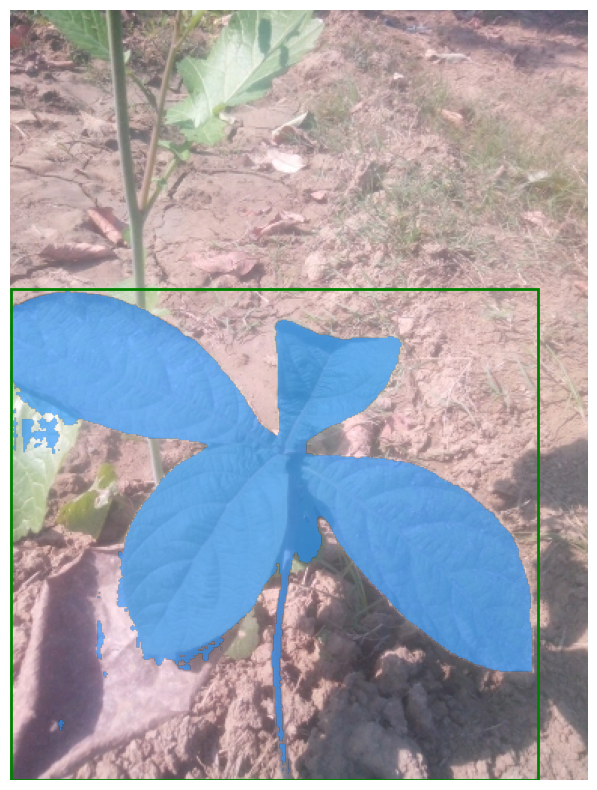

In [14]:
generate('plant', '/teamspace/studios/this_studio/2021.02.01.15.36.01_25.307944666666664_81.02299233333332_65b412b4-571f-4f7d-9870-e8411a0f50db_IMG_20210201_131655_4942076793013214474.jpg')

In [15]:
print(os.getcwd())

/teamspace/studios/this_studio


In [16]:
!pip install boto3
import boto3
s3 = boto3.resource()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [17]:
%cd /teamspace/studios/this_studio/Deeplab/

/teamspace/studios/this_studio/Deeplab


In [18]:
!pip install -r requirements.txt

# Importing all Requirements
from torch.utils.data import dataset
from tqdm import tqdm
import network
import utils
import os
import random
import argparse
import numpy as np
from torch.utils import data
from datasets import VOCSegmentation, Cityscapes, cityscapes, LeafDataset
from torchvision import transforms as T
from metrics import StreamSegMetrics, BinarySegMetrics
import torch
import torch.nn as nn
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from glob import glob
import random
import loralib as lora


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [19]:
inhouse_default = '/teamspace/studios/this_studio/Deeplab/saved_models/best_deeplabv3plus_mobilenet_custom_os16_0.7854892764326529.pth'
#Deeplab/saved_models/best_deeplabv3plus_mobilenet_custom_os16_0.7854892764326529.pth

In [20]:
def decode_target(mask):
  leaf_color = [255, 255, 255]
  rgb_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
  rgb_mask[mask == 1] = leaf_color
  return Image.fromarray(rgb_mask)

def show(image):
  sample = Image.open(image)
  plt.imshow(sample)
  plt.axis("off")
  plt.show()

img_transform = T.Compose([
              T.Resize((512, 512)),
              T.ToTensor(),
              T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
          ])

mask_transform = T.Compose([
              T.Resize((512, 512), interpolation=T.InterpolationMode.NEAREST),
              T.ToTensor(),
          ])

def load_deeplab_model(ckpt, model_type = 'deeplabv3plus_mobilenet', num_classes= 1, output_stride= 16):
  os.environ['CUDA_VISIBLE_DEVICES'] = '0'
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  print("Device: %s" % device)

  model = network.modeling.__dict__[model_type](num_classes, output_stride)
  network.convert_to_separable_conv(model.classifier)
  utils.set_bn_momentum(model.backbone, momentum=0.01)
  checkpoint = torch.load(ckpt, map_location=torch.device('cpu'))
  model.load_state_dict(checkpoint["model_state"])
  model = nn.DataParallel(model)
  model.to(device)
  print("Resume model from %s" % ckpt)
  del checkpoint
  return model

def get_target(mask_path):
  mask = Image.open(mask_path)
  mask_array = np.array(mask)
  mask_array = (mask_array > 128).astype(np.uint8)
  mask_array = mask_array * 255
  mask = Image.fromarray(mask_array.astype(np.uint8))
  mask = mask_transform(mask)
  mask = torch.squeeze(mask, 0)
  mask = mask.to(device, dtype=torch.long)
  mask = mask.float()
  return mask.cpu().numpy()

def create_histogram(confidence, region, species):

  # list of bins
  bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1]
  plt.hist(confidence, bins=bins, edgecolor='black')

  if species == None:
    plt.title(region  + ', Image Count - ' + str(len(confidence)))
  else:
    plt.title(region + ' - ' + species + ', Image Count - ' + str(len(confidence)))

  # plotting labelled histogram
  plt.xlabel('Model Confidence')
  plt.ylabel('Image Count')
  plt.show()
'''
def generate(region):
  region_species = []
  for i in inhouse_trained_samples:
    if i.startswith(region):
      region_species.append(os.path.basename(i).split('_')[1].upper())

  region_species = list(set(region_species))
  region_main_list = region_rand_list(region, region_species)
  region_confidence_list = model_confidence(region_main_list, download = True)
  create_histogram(region_confidence_list, region, species = None)
'''

def region_rand_list(region, species_list, my_bucket = s3.Bucket('treetracker-training-images')):
  main_list = []
  for i in species_list:
    sample_objects = my_bucket.objects.filter(Prefix= region + '/' + i + '/')
    sample_list = [i.key for i in sample_objects]
    if len(sample_list) < 100:
      main_list.extend(sample_list)
    else:
      main_list.extend(random.sample(sample_list, 100))

  return main_list


In [21]:
inhouse_default = '/teamspace/studios/this_studio/Deeplab/saved_models/best_deeplabv3plus_mobilenet_custom_os16_0.7854892764326529.pth'
#Deeplab/saved_models/best_deeplabv3plus_mobilenet_custom_os16_0.7854892764326529.pth

In [33]:
def deeplab_prediction(s3_key, download = True, my_bucket = s3.Bucket('treetracker-training-images')):
    metrics = BinarySegMetrics()
    denorm = utils.Denormalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])

    load_deeplab_model(inhouse_default) 
    with torch.no_grad():
        model = load_deeplab_model(inhouse_default).eval() 
        if download:
            my_bucket.download_file(s3_key, os.path.join(os.getcwd(),'test.jpg'))
        else:
            img = Image.open(s3_key).convert('RGB') 


        
        img = Image.open(os.path.join(os.getcwd(),'test.jpg')).convert('RGB') 
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        '''
        ext = os.path.basename(img_path).split('.')[-1]
        img_name = os.path.basename(img_path)[:-len(ext)-1]
        # binary masks are named as
        path_to_samples = img_path[:len(img_path) - len(ext) - len(img_name) - 2]
        path_to_masks = path_to_samples[:len(path_to_samples) - (len(os.path.basename(path_to_samples)))]
        mask_path = path_to_masks + 'binary_masks/' + img_name + '_binarymask.' + ext
        '''
        img_name = 'something.jpg'
        img = img_transform(img).unsqueeze(0)
        img = img.to(device, dtype=torch.float32)
        output = model(img)
        img = img[0].detach().cpu().numpy()
        img = (denorm(img) * 255).transpose(1, 2, 0).astype(np.uint8) # for generating overlayed masks

        output = torch.squeeze(output, dim=1)
        prob = torch.sigmoid(output).detach()

        pred = (prob > 0.5).long().cpu().numpy()
        pred = pred[0]
        prob = prob[0]

        prob = prob.cpu().numpy()
        fig = plt.figure()
        plt.imshow(img)
        plt.axis('off')
        plt.imshow(pred, alpha=0.7)
        ax = plt.gca()
        ax.xaxis.set_major_locator(matplotlib.ticker.NullLocator())
        ax.yaxis.set_major_locator(matplotlib.ticker.NullLocator())
        plt.savefig(save_overlayed_to + img_name + '_overlayed.jpg', bbox_inches='tight', pad_inches=0)
        plt.close()                           

Device: cuda


Resume model from /teamspace/studios/this_studio/Deeplab/saved_models/best_deeplabv3plus_mobilenet_custom_os16_0.7854892764326529.pth
Device: cuda
Resume model from /teamspace/studios/this_studio/Deeplab/saved_models/best_deeplabv3plus_mobilenet_custom_os16_0.7854892764326529.pth


NameError: name 'save_overlayed_to' is not defined

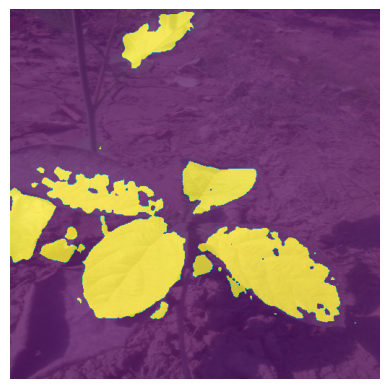

In [23]:
deeplab_prediction('/teamspace/studios/this_studio/2021.02.01.15.36.01_25.307944666666664_81.02299233333332_65b412b4-571f-4f7d-9870-e8411a0f50db_IMG_20210201_131655_4942076793013214474.jpg')

Certainty (Grouding dino) for this image is: tensor(0.5258)


Generating Mask:




SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


SAM score for this mask is: 0.9323719


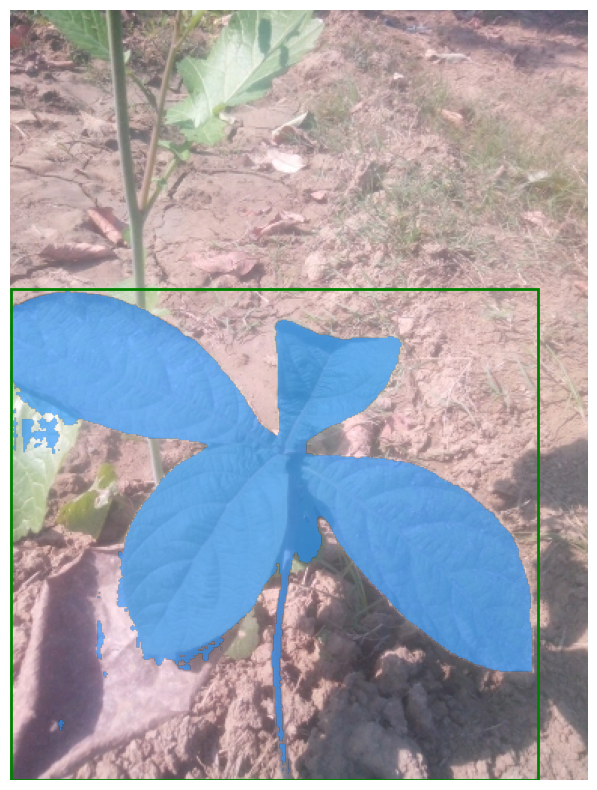

In [ ]:
generate('plant','/teamspace/studios/this_studio/2021.02.01.15.36.01_25.307944666666664_81.02299233333332_65b412b4-571f-4f7d-9870-e8411a0f50db_IMG_20210201_131655_4942076793013214474.jpg')

In [24]:
!pip install boto3
import boto3
s3 = boto3.resource()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [26]:
my_bucket = s3.Bucket('treetracker-training-images')
sample_paths = []
sample_objects = my_bucket.objects.filter(Prefix='eastafrica/ACACAURI/')
for obj in sample_objects:
  sample_paths.append(obj.key)
print(sample_paths[1])

eastafrica/ACACAURI/2020.05.08.14.58.26_f7bd61ff-f412-45a8-bbcd-e2a9d95e443a_IMG_20200508_132506_1985058645.jpg


Device: cuda
Resume model from /teamspace/studios/this_studio/Deeplab/saved_models/best_deeplabv3plus_mobilenet_custom_os16_0.7854892764326529.pth
Device: cuda
Resume model from /teamspace/studios/this_studio/Deeplab/saved_models/best_deeplabv3plus_mobilenet_custom_os16_0.7854892764326529.pth


NameError: name 'save_overlayed_to' is not defined

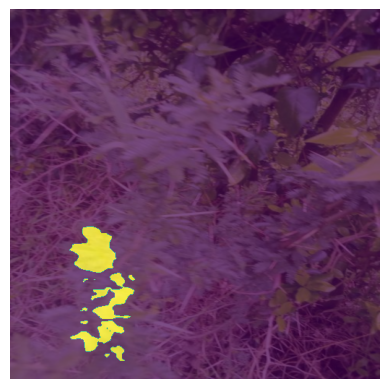

In [34]:
deeplab_prediction(sample_paths[1])

In [29]:
print(os.getcwd())

/teamspace/studios/this_studio/Deeplab


In [30]:
print(os.path.join(os.getcwd(),'test.jpg'))

/teamspace/studios/this_studio/Deeplab/test.jpg


In [31]:
fname = os.path.join(os.getcwd(),'test.jpg')

In [32]:
print(os.path.isfile(fname))

True


Certainty (Grouding dino) for this image is: tensor(0.3785)


Generating Mask:




SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


SAM score for this mask is: 0.96537197


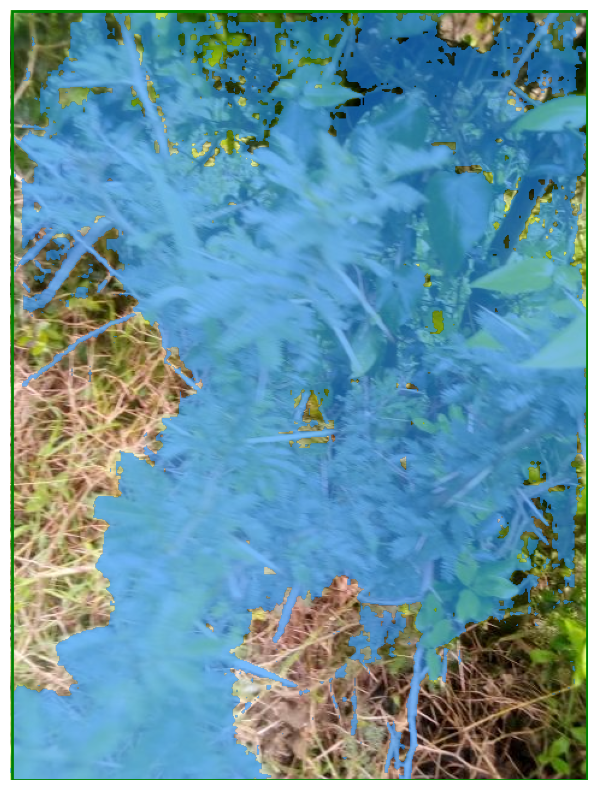

In [35]:
generate('plant', fname)